<a id='top'></a>

# Homework 6: Bootstrapping, Hypothesis Testing, P-Hacking, and Simple Linear Regression 
***

**Name**: **Elena Ingraham**

***

This assignment is due on Moodle by **5 PM on Friday July 13**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | [Problem 5](#p5)

---

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy import stats 
%matplotlib inline

---
[Back to top](#top)
<a id='p1'></a>

### [12 points] Problem 1 - Hypothesis Testing Whether your Co-worker is a Doofus

You are working as a Data Scientist for an internet company. Your co-worker, Daley Jennanigans, is a lovable scamp! Unfortunately, Daley also makes a lot of mistakes throughout the day as the two of you team up to tackle some inference work regarding your company's customers. In each case, clearly explain why Daley's hypothesis testing setup or conclusion is incorrect.

**Part A**: Daley has some data on the characteristics of customers that visited the company's website over the previous month.  He wants to perform an analysis on the proportion of last month's website visitors that bought something.  Let $X$ be the random variable describing the number of website visitors who bought something in the previous month, and suppose that the population proportion of visitors who bought something is $p$. Daley is particularly interested to see if the data suggests that more than 10% of website visitors actually buy something.  He decides to perform the test with a null hypothesis of $H_0: \hat{p} = 0.10$. 

**In this case $ \hat{p}$ should just be p, because the null hypothesis is supposed to be making a statement with regards to the *population* proportion, not a sample proportion.**

**Part B**: Daley decides instead to do his hypothesis test with a null hypothesis of $H_0: p < 0.10$.  

**This is the null hypothesis which requires $H_0$ to be defined and not on the end of an inequality, it should be $H_0: p = 0.10$.**

**Part C**: Finally on track with reasonable hypotheses of $H_0: p = 0.10$ and $H_1: p > 0.10$, Daley computes a normalized test-statistic of $z = -1.4$ for the sample proportion and concludes that since $z = -1.4 < 0.05$ there is sufficient statistical evidence at the $\alpha = 0.05$ (95%) significance level that the proportion of customers who buy something is less than 10%.

**He needs to compare the normalized test statistic he found with the z-crit value associated with his alpha value of .05, which should be -1.65. Since -1.4 is not less than -1.65 he does not have evidence to reject the null hypothesis** 

**Part D**: Daley is again conducting the hypothesis test of $H_0: p = 0.10$ and $H_1: p > 0.10$. He computes a p-value of $0.03$, and thus concludes that there is only a 3% probability that the null hypothesis is true. 

**The p-value represents the probability of taking a sample and seeing a test statistic as extreme or more extreme than the one we found. It has nothing to do with the probability of the null hypothesis being true, it just helps us determine the likelihood of seeing our test statistic in a sample given the conditions about the population given by the null hypothesis.**

---
[Back to top](#top)
<a id='p2'></a>

### [20 points] Problem 2 - Evaluating Pizza Delivery Performance 

The manager of a pizza chain with multiple locations likes to keep meticulous data on his pizza deliveries.  The data from more than 1200 deliveries in May 2014 is stored in [`pizza.csv`](https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jja0n7mvrrc671). 

In [26]:
dfP = pd.read_csv("/home/elena/Documents/Data_Science/pizza.csv")
dfP.head()

,day,date,time,operator,branch,driver,temperature,bill,pizzas
0,Thursday,1-May-14,33.708636,Laura,East,Bruno,71.433084,58.4,4
1,Thursday,1-May-14,29.382070,Melissa,East,Salvatore,64.952920,26.4,3
2,Thursday,1-May-14,33.580664,Melissa,West,Salvatore,49.113452,58.1,3
3,Thursday,1-May-14,32.505369,Melissa,East,Salvatore,64.872559,35.2,3
4,Thursday,1-May-14,25.493613,Melissa,West,Salvatore,59.630052,38.4,2


**Part A**: The manager's goal is to have an average delivery time across all branches of less than 30 minutes.  Perform an appropriate hypothesis test at the $\alpha=0.05$ significance level to evaluate whether this goal has been achieved.  Be sure to clearly state your null and alternate hypotheses, describe your testing procedure, and show all calculations in Python. 

**A.) For this problem we are trying to answer whether or not it is probable to see a data set with a mean of 29.455 if the population mean is greater than 30. In other words, is it probable to see this sample mean if the population mean is greater than 30? This means our null and alternate hypothesis would be as follows:**

$H_0: \mu = 30$

$H_1: \mu < 30$

In [27]:
print("The mean delivery time is: ", dfP['time'].mean())

print("Number of data points in sample: ", len(dfP['time']))

print("Standard Deviation of the sample: ", dfP['time'].std())

The mean delivery time is:  29.45529402793836
Number of data points in sample:  1266
Standard Deviation of the sample:  6.111591185889421


** Now we can find our $z_crit$ value by taking filling in the formula: $\frac{\bar{x}-\mu}{\frac{\sigma}{\sqrt{n}}}$ with $\bar{x}$ = 29.45529, from our sample, and $\mu$ = 30, from the null hypothesis stated above. n = 1266, since it is the number of times in our sample as calculated above. And $\sigma$ = 6.111591, also calculated above.**

**After plugging into the formula we are left with  $\frac{29.4553-30}{\frac{6.1116}{\sqrt{1266}}}$ which can be computed with python like so: **

In [28]:
print("The z value is: ",(29.4553-30)/(6.1116/math.sqrt(1266)))

The z value is:  -3.1711684052051035


**Now we can take this value and find the p-value by utilizing the cdf, which will give us the probability of seeing something this extreme, or more extreme give the null hypothesis. **

In [29]:
print(1- (stats.norm.cdf(-3.1711684052051035)))  

0.999240864516


**Since the p value 0.99924 > .05, which was our $\alpha$ (significance level). This makes sense, because 29.45529 is extremely close to 30, and with a standard deviation of 6.111591 it is understandable that we could take a sample with a mean of 29.45529 when the true population mean is 30. We do not have enough evidence to  reject the null hypothesis, i.e. the manager cannot assume the average delivery time is less than 30. **

**Part B**: The pizza shop has fallen on hard times and is considering closing a branch. The manager knows that the East branch is the lowest performing branch, followed by the West branch, as measured by the the mean number of pizzas per delivery.

In [187]:
for branch in set(dfP["branch"]):
    print("{:6s} branch mean pizzas/delivery = {:0.3f}".format(branch, dfP.loc[dfP["branch"]==branch, "pizzas"].mean()))
    print("{:6s} branch std pizzas/delivery = {:0.3f}".format(branch, dfP.loc[dfP["branch"]==branch, "pizzas"].std()))

Centre branch mean pizzas/delivery = 3.368
Centre branch std pizzas/delivery = 1.384
West   branch mean pizzas/delivery = 3.207
West   branch std pizzas/delivery = 1.446
East   branch mean pizzas/delivery = 2.429
East   branch std pizzas/delivery = 1.275


In [190]:
west = []
west = dfP.groupby(["branch"]).get_group ("West")
len(west)

435

In [195]:
east = []
east = dfP.groupby(["branch"]).get_group ("East")
len(east)

410

In [200]:
center = []
center = dfP.groupby(["branch"]).get_group ("Centre")
len(center)

421

Can the manager conclude that the East branch is performing statistically significantly lower than the other two branches? Can he conclude that the West branch performs significantly worse than the Centre branch? Conduct hypothesis tests to answer these questions. Both of those questions will help him decide whether or not to close the East branch. The stakes are higher when making the decision to close an entire branch of pizza restaurant, so the manager decides to use the $\alpha=0.01$ significance level for these tests. Be sure to clearly describe your hypotheses and methodology, and show any relevant computations in Python. 

**Let's assume the population mean is equivalent to the West Branch's mean and test against it. The null and alternate hypothesis are as follows: **

For the under performance of the East Branch:

$H_0: \mu_1 = \mu_2$

$H_1: \mu_1 < \mu_2$

For the under performance of the West Branch:

$H_0: \mu_1 = \mu_2$

$H_1: \mu_1 > \mu_2$

In [173]:
print("Then we can compute with python: ")
print("The z-crit value for both tests: ", -(stats.norm.ppf(.9)))
print("It's negative because this is a lower tail test")

Then we can compute with python: 
The z-crit value for both tests:  -1.28155156554
It's negative because this is a lower tail test


In [206]:
(2.429 - 3.207)/math.sqrt(((1.446*1.446)/435)+((1.275*1.275)/410))

-8.306902940439967

**Since -8.3069029404 < -1.2815 there is reasonable evidence to reject the null hypothesis and conclude the East branch is under performing.**

**Computation to find out if the West branch is under performing compared to the Centre Branch**

In [205]:
(3.207-3.368)/math.sqrt(((1.275*1.275)/410)+ ((1.384*1.384)/421))

-1.7447805004847519

**Since -1.744 < -1.2815 there is reasonable evidence to reject the null hypothesis and conclude the west branch is under performing.**

**Part C**: It has been hypothesized that two of the manager's finest drivers, Mario and Luigi, deliver different numbers of pizzas per delivery. Conduct an appropriate hypothesis test at the $\alpha = 0.05$ significance level to determine if there is any statistically significant difference between the mean number of pizzas per delivery for the two drivers.

In [31]:
mario = []
mario = dfP.groupby(["driver"]).get_group ("Mario")
mario.head()

,day,date,time,operator,branch,driver,temperature,bill,pizzas
7,Thursday,1-May-14,22.186179,Melissa,West,Mario,61.187654,35.8,2
8,Thursday,1-May-14,35.324994,Laura,Centre,Mario,64.204093,36.6,2
11,Thursday,1-May-14,29.131207,Laura,East,Mario,69.949241,49.7,4
12,Thursday,1-May-14,21.926461,Melissa,West,Mario,60.798941,41.1,1
16,Thursday,1-May-14,37.398504,Melissa,Centre,Mario,54.507040,34.9,3


In [32]:
luigi = []
luigi = dfP.groupby(["driver"]).get_group ("Luigi")
luigi.head()

,day,date,time,operator,branch,driver,temperature,bill,pizzas
52,Friday,2-May-14,26.901239,Melissa,West,Luigi,73.658217,48.4,5
53,Friday,2-May-14,34.346185,Laura,Centre,Luigi,68.012042,41.2,2
55,Friday,2-May-14,28.062180,Melissa,East,Luigi,56.797264,37.1,2
56,Friday,2-May-14,27.027611,Melissa,West,Luigi,72.592846,46.5,3
60,Friday,2-May-14,34.048307,Melissa,West,Luigi,72.046367,41.4,3


**The z-value for this hypothesis test can be computed like so: **

In [211]:
print(-stats.norm.ppf(.95))

-1.64485362695


**It's negative because I am doing a lower tail test.**

In [208]:
print("Mario's mean: ", mario["pizzas"].mean())
print("Mario's std: ", mario["pizzas"].std())
print("Mario's n: ", len(mario))
print("Luigi's mean: ", luigi["pizzas"].mean())
print("Luigi's std: ", luigi["pizzas"].std())
print("Luigi's n: ", len(luigi))


Mario's mean:  2.952513966480447
Mario's std:  1.3782958842796846
Mario's n:  358
Luigi's mean:  3.206896551724138
Luigi's std:  1.4459376674399615
Luigi's n:  435


In [217]:
(2.952513966480447-3.206896551724138)/math.sqrt(((1.3782958842796846*1.3782958842796846)/358)+(( 1.4459376674399615* 1.4459376674399615)/435))

-2.529609882819934

In [219]:
print("P value")
stats.norm.cdf((2.952513966480447-3.206896551724138)/math.sqrt(((1.3782958842796846*1.3782958842796846)/358)+(( 1.4459376674399615* 1.4459376674399615)/435)))

P value


0.0057094706035383186

**Since -2.53 is less than -1.644, and our p-value .006 < our alpha value .05 we know seeing this mean is very rare, and it is fair to reject the null hypothesis and say that Luigi is performing better than Mario to a statistically significant level. **

---
[Back to top](#top)
<a id='p3'></a>

### [20 points] Problem 3 - Naps vs Coffee for Memory? 

It is estimated that [about 75% of adults](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4997286/) in the United States drink coffee. Often, coffee is used to replace the need for sleep. It works alright, or so I think. Let's find out, in this exciting homework problem!

One recent study investigated the effects of drinking coffee, taking a nap, and having a ["coffee-nap"](https://lifehacker.com/naps-vs-coffee-which-is-better-when-youre-exhausted-1730643671) - the practice of drinking some coffee *and then* having a short nap. The study broke participants up into three groups of 10 participants each, where the groups would have a nap, or have a coffee, or have a coffee-nap, then perform a task where their reaction time was measured. In previous experiments the mean reaction time measurement was found to be normally distributed. The reaction time means (milliseconds, ms) and standard deviations for the three groups of participants are given in the table below.

$$
\begin{array}{c|c|c|c}
\textrm{Group} & \textrm{Sample Size} & \textrm{Mean} & \textrm{Standard Deviation} \\
\hline 
\textrm{Coffee+Nap} & 10 & 451.3 & 31.9 \\ 
\textrm{Coffee} & 10 & 494.2 & 39.6 \\ 
\textrm{Nap} & 10 & 492.8 & 45.2 \\ 
\end{array}
$$

**Part A**: Compute a 95% t-confidence interval for the mean reaction time measurement for participants in each of these three groups. (You should find three separate confidence intervals.) Do all computations in Python, and report the results.  Can you make any conclusions regarding whether coffee, naps or both (coffee-naps) are better for faster reaction times?

**The t values can be computed using the following formula: lower bound = $\bar{x} - t* \frac{\sigma}{\sqrt{n}}$ and upper bound = $\bar{x} + t* \frac{\sigma}{\sqrt{n}}$where t = stats.t.ppf(.95, 9) since our confidence level is 95%, and our degrees of freedom, n-1, is 9.  **

In [34]:
print("The t-value for a 95% t-confidence interval with 9 degrees of freedom is: ", stats.t.ppf(.95,9))

The t-value for a 95% t-confidence interval with 9 degrees of freedom is:  1.83311293265


In [35]:
coffeenap_upper = 451.3 + (1.833*(31.9/math.sqrt(10)))
coffeenap_lower = 451.3 - (1.833*(31.9/math.sqrt(10)))
print(coffeenap_upper, coffeenap_lower)

469.79069129397277 432.80930870602725


In [36]:
coffee_upper = 494.2 + (1.833*(39.6/math.sqrt(10)))
coffee_lower = 494.2 - (1.833*(39.6/math.sqrt(10)))
print(coffee_upper, coffee_lower)

517.153961606311 471.246038393689


In [37]:
nap_upper = 492.8 + (1.833*(45.2/math.sqrt(10)))
nap_lower = 492.8 - (1.833*(45.2/math.sqrt(10)))
print(nap_upper, nap_lower)

518.9999763789207 466.60002362107934


And we can plug in each sample's details like so (computed above):

**Coffee+Nap: **

lower bound: $451.3 - 1.833* \frac{31.9}{\sqrt{10}}$ 

upper bound: $451.3 + 1.833* \frac{31.9}{\sqrt{10}}$ 

Confidence t-interval = (469.491, 432.509)

**Coffee: **

lower bound: $494.2 - 1.833* \frac{39.6}{\sqrt{10}}$ 

upper bound: $494.2 + 1.833* \frac{39.6}{\sqrt{10}}$ 

Confidence t-interval = (517.154, 471.246)

**Nap: **

lower bound: $492.8 - 1.833* \frac{45.2}{\sqrt{10}}$ 

upper bound: $492.8 + 1.833* \frac{45.2}{\sqrt{10}}$ 


Confidence t-interval = (519.000, 466.600)


**Part B**: Use an appropriate hypothesis test to determine if there sufficient evidence, at the $\alpha = 0.05$ significance level, to conclude that taking a nap promotes faster reaction time than drinking coffee.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

Let $\theta$ = Mean reaction time of drinking coffee, and $\theta_0$ = Mean reaction time of nap takers. Since we are trying to find out if the reaction time is faster for nap takers, the mean should be smaller. Therefore we are left with:

**Null Hypothesis: $H_0: \theta = \theta_0$**

**Alternate Hypothesis: $H_1: \theta > \theta_0$**

In [222]:
print("The t value for this test is:", -stats.t.ppf(.95,9))

The t value for this test is: -1.83311293265


In [220]:
(492.8-494.2)/math.sqrt(((45.2*45.2)/10)+((39.6*39.6)/10))

-0.07367196689546883

**Part C**: Use an appropriate hypothesis test to determine if there is sufficient evidence, at the $\alpha = 0.05$ significance level, to conclude that taking a coffee-nap promotes faster reaction time than only drinking coffee, or only having a nap.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

In [221]:
(451.3-492.8)/math.sqrt(((31.9*31.9)/10)+((39.6*39.6)/10))

-2.580792871533051

** Since -2.580792871533051 < -1.83311293265 there is significant evidence to reject the null hypothesis and claim that Coffee-nap promotes better reaction time then just drinking Coffee.**

In [223]:
(451.3-494.2)/math.sqrt(((45.2*45.2)/10)+((31.9*31.9)/10))

-2.452169338545207

** Since -2.452169338545207 < -1.83311293265 there is significant evidence to reject the null hypothesis and claim that Coffee-nap promotes better reaction time then just taking a nap.**

**Part D**: Compute a 95% confidence interval for the standard deviation of reaction time for coffee-nap takers. Do all computations in Python, and report the results.

** this follows a chi-square distribution and can be computed like so: **

** (df x std^2)/(chi-test statistic ^2) for both the upper and lower chi-square test statistic (from table)**
**in this case df = 9 b/c n is 10**

In [336]:
upper = (9*31.9**2)/(2.7**2) 
lower = (9*31.9**2)/(19.023**2)
print("The CI for the standard deviation is: ")
print(upper, lower)

The CI for the standard deviation is: 
1256.3086419753085 25.308468173508835


---
[Back to top](#top)
<a id='p4'></a>

### [15 points] Problem 4 - Bad Science for Fun and Profit 

[Data Dredging](https://en.wikipedia.org/wiki/Data_dredging) and [p-hacking](https://www.explainxkcd.com/wiki/index.php/882:_Significant) are umbrella terms for the dangerous practice of automatically testing a large number of hypotheses on the entirety or subsets of a single dataset in order to find statistically significant results. In this exercise we will focus on the idea of testing hypotheses on subsets of a single data set.  

Johnny Nefarious has landed his first data science internship at an online marketing firm.  His primary summer project has been to design and test a new email advertisement for his company's best-selling product. To test his advertisement his supervisors have allowed him to send his ad to 4 targeted customer groups of 50 people every day for a month, and keep track of which email client (Outlook or Gmail) the customers use.

The effectiveness of online advertising is typically measured by the ad's [click-through rate](https://en.wikipedia.org/wiki/Click-through_rate) (CTR), which is defined to be the _proportion_ of users that click on an advertisement. The company's standard email advertisement has a CTR of $0.05$.  Johnny is hoping to land a permanent position at the company when he graduates, so he's **really** motivated to show his supervisors that the CTR of his email advertisement is a (statistically) significant improvement over their previous ad. 

The data from Johnny's summer experiment can be found in [`email.csv`](https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jja0n7qay9y674). Load this dataset into Pandas. 

In [38]:
dfAd = pd.read_csv("/home/elena/email.csv")
dfAd.head()

,Group,Client,Sent,Clicked
0,1,Gmail,50,4
1,1,Gmail,50,3
2,1,Gmail,50,1
3,1,Outlook,50,4
4,1,Gmail,50,3


**Part A**: State the null and alternate hypotheses that Johnny should test to see if his ad campaign is an improvement over the company's standard mailer with a CTR of $0.05$. 

**The null hypothesis that the click through rate is 0.05 can be represented as: $H_0: p = 0.05$ and alternate hypothesis would be, $H_1: p > 0.05$.**

**Part B**: Test the hypothesis from **Part A** at the $\alpha = 0.05$ significance level using a p-value test. Is there sufficient evidence for Johnny to conclude that his ad campaign is an improvement?   

In [55]:
ctrs = np.array([])
for index, row in dfAd.iterrows():
    ctr = row['Clicked']/row['Sent']
    ctrs = np.append(ctrs, ctr)
print("Mean CTR: ", ctrs.mean())
print("standard Deviation: ", ctrs.std())

Mean CTR:  0.0513333333333
standard Deviation:  0.030521395046


In [70]:
(0.0513333333333 - .05)/math.sqrt((.05*(1-.05))/len(ctrs))

0.03460723650703077

In [60]:
stats.norm.ppf(0.95) 

1.6448536269514722

**Since the z-critical value computed, 0.0346, is not greater than the z value that defines the rejection region, 1.65, which is needed to reject the null hypothesis, Johnny does not have enough evidence to suggest that the ad campaign provides a statistically significant improvement in CTR.**

**Part C**: "Aw, shucks!", Johnny thinks. This is the part where he decides to resort to some questionable science.  Maybe there is a reasonable subset of the data for which his alternative hypothesis is supported?  Can he find it?  Can he come up for a reasonable justification for why this subset of the data should be considered while the rest should be discarded? 

Here are the **rules**: Johnny cannot modify the original data (e.g. by adding nonexistent clicks to certain groups) because his boss will surely notice.  Instead he needs to find a subset of the data for which his hypothesis is supported by a p-value test at the $\alpha = 0.05$ significance level _and_ be able to explain to his supervisors why his sub-selection of the data is reasonable.  

In addition to your explanation of why your successful subset of the data is potentially reasonable, be sure to thoroughly explain the details of the tests that you perform and show all of your Python computation.  

In [148]:
ctrs = np.array([])
for index, row in dfAd.iterrows():
    ctr = row['Clicked']/row['Sent']
    if(ctr >= .07):
        ctrs = np.append(ctrs, ctr)
print("Mean CTR: ", ctrs.mean())
print("standard Deviation: ", ctrs.std())
print("N: ", len(ctrs))

Mean CTR:  0.091875
standard Deviation:  0.0156998208589
N:  32


In [160]:
print("Maybe the hypothesis itself was wrong, let's just go back and change the alternate hypothesis to be p > .04")
print("Z-crit value for subset: ")
#fill in .04 for .05 
(0.091875 - .04)/math.sqrt((.03*(1 -.04))/len(ctrs))

Maybe the hypothesis itself was wrong, let's just go back and change the alternate hypothesis to be p > .04
Z-crit value for subset: 


1.7291666666666667

And viola! Since 1.729 > 1.65, the results are significant enough for Johnny to reject the null hypothesis.

**Johnny did nothing to change the original data, and hopefully he can tell his boss that with a straight face. If not, he doesn't deserve to be in this cut-throat business. He basically moved the goal posts to test at the same significance level against a different p-value, and on top of that only selected data points with a CTR that was greater than or equal to .07. He could justify this to his boss by saying that the higher datapoints are more *interesting* and we should focus on our success because it makes us feel good.**

---
[Back to top](#top)
<a id='p5'></a>

### [15 points] Problem 5 - Simple Linear Regression for the Consumption of Ice Cream Treats

The data in [`icecream.csv`](https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jja0n80849467a) contains information on a particular runner's ice cream eaten (in scoops) and miles run on particular days over the past year. In this exercise you will construct a simple linear regression model for the response variable "amount of ice cream consumed" (`scoops`), using "number of miles run" (`miles`) as the feature. Load the data into a Pandas DataFrame.

In [229]:
dfTreats = pd.read_csv("/home/elena/icecream.csv")
dfTreats.head()


100

**Part A**: Perform a simple linear regression with `miles` as the feature and `scoops` as the response.  Report the estimated regression model in the form $Y = \alpha + \beta x$. Do all computations in Python. 

In [238]:
def regression(x,y):
    xbar = x.mean()
    ybar = y.mean()
    numerator = np.array((x-xbar)*(y-ybar)).sum()
    denominator = np.array((x-xbar)*(x-xbar)).sum()
    beta = numerator/denominator
    alpha = ybar - beta*xbar
    yhat = alpha + beta*x
    print("Alpha =", alpha)
    print("Beta =", beta)
    print("Regression Line: Y = ", alpha, '+',beta, 'x')
    return yhat
regression(dfTreats['miles'],dfTreats['scoops'])

Alpha = 2.88047729639
Beta = 0.415533124951
Regression Line: Y =  2.88047729639 + 0.415533124951 x


0     8.822821
1     6.770495
2     8.668576
3     8.146710
4     9.551906
5     5.711998
6     8.291190
7     7.175169
8     5.518207
9     8.786929
10    7.372100
11    9.235549
12    5.834610
13    7.736248
14    5.696787
15    5.942269
16    6.520570
17    5.940855
18    6.668322
19    8.262656
20    7.850904
21    5.694391
22    6.669112
23    3.447010
24    4.975827
25    7.107693
26    8.970198
27    4.841267
28    5.080523
29    7.360473
        ...   
70    5.460395
71    7.119351
72    5.936471
73    4.464611
74    9.243262
75    5.869671
76    7.874186
77    7.473346
78    8.805009
79    5.919889
80    5.426009
81    9.407866
82    8.149784
83    9.597319
84    4.999223
85    3.704755
86    5.430884
87    5.026321
88    5.420617
89    5.596891
90    5.340394
91    6.645947
92    7.973690
93    4.880092
94    4.658007
95    7.594194
96    8.490702
97    3.535931
98    9.127248
99    4.427078
Name: miles, Length: 100, dtype: float64

**Part B**: Make a scatter-plot of the data with `miles` as the feature and `scoops` as the response, and overlay the estimated regression line.  Clearly label all relevant plot elements and include a legend.

Alpha = 2.88047729639
Beta = 0.415533124951
Regression Line: Y =  2.88047729639 + 0.415533124951 x


Text(0.5,1,'Scoops per Mile')

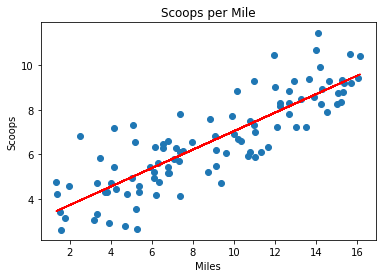

In [253]:
fig, ax = plt.subplots()
scatter = ax.scatter(dfTreats['miles'], dfTreats['scoops'])
line = ax.plot(dfTreats['miles'],regression(dfTreats['miles'],dfTreats['scoops']),color='red')
ax.set_xlabel("Miles", fontdict=None, labelpad=None)
ax.set_ylabel("Scoops", fontdict=None, labelpad=None)
ax.set_title("Scoops per Mile")

**Part C**: Give a physical interpretation of the coefficients $\hat{\alpha}$ and $\hat{\beta}$, estimated from your model. Is the relationship between run lengths and ice cream consumption positive or negative? Fully justify your responses.

**$\hat{\alpha}$ is the estimate of the $\alpha$ coefficient, that becomes more accurate as the model progresses. $\alpha$ ends up representing a baseline number of scoops in this problem as it is the y intercept. $\hat{\beta}$ is similar but represents the estimation of the $\beta$ coefficient which measures the slope of the regression line. The rekationship between run lengths and ice cream consumption is positive, because $\beta$ is positive which means as the number of miles increases so does the amount of icecream consumed.**

**Part D**: How much ice cream does your simple linear regression model predict the runner will consume if they run a marathon (26.2 miles)? What are potential drawbacks to this model for ice cream consumption?

**My model predicts that after a marathon the runner will consume 14 scoops of icecream. This kind of extrapolation will lead to errors since common knowledge tells us that this model should not be divergent since no one can consume an infinite number of scoops of icecream. In fact the limit would be long before that, and the model should be able to contain a peak number of miles run and a peak number of scoops because both of those events are not limitless. **

**Part E**: Are there any other features you think should be added to the model, making this a *multiple* linear regression model?

**It might be important to factor in age because it is very possible that age has an effect on overall icecream consumption. **

---
[Back to top](#top)
<a id='p6'></a>

### [15 points] Problem 6 - "Central Limit-ish Theorem" for the Log-normal Distribution

The log-normal distribution arises in many applications, such as (but not limited to!) modeling the distribution of extreme values like monthly rainfall, modeling the distribution of income for the bulk of the population, and the length of some board games. It is useful, but can be a little tough to wrap your head around at first. There is a "logarithm" right in the name, after all. So let's tame this beast.

Execute the code below to obtain a sample of 10,000 random draws from a [log-normal distribution](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.lognormal.html) with parameters $\mu = 3$ and $\sigma = 0.25$.

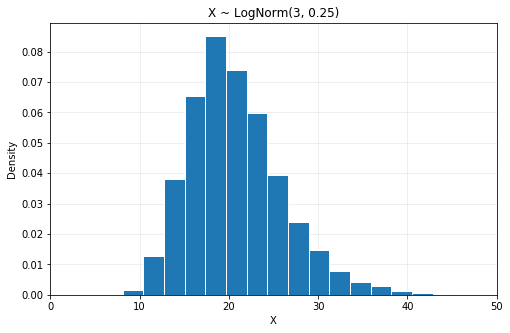

In [294]:
sigma = 0.25
mu = 3
n = 10000
x = pd.Series(np.random.lognormal(mean=mu, sigma=sigma, size=n))
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
x.hist(ax=ax, edgecolor="white", bins=20, normed=True)
ax.set_xlim([0,50])
ax.set_xlabel('X')
ax.set_ylabel('Density')
ax.set_title('X ~ LogNorm({}, {})'.format(mu,sigma))
ax.set_axisbelow(True)
ax.grid(alpha=0.25);

**Part A**: Recall that the log-normal pdf for a random variable $X$ is given by
$$f(x \mid \mu, \sigma) = \dfrac{1}{x\sigma \sqrt{2 \pi}} e^{-\frac{1}{2}\left(\frac{\log{x} - \mu}{\sigma}\right)^2}$$

Thus, if you have a random variable $X \sim LogNorm(\mu, \sigma)$, the transformed random variable $Y = \log(X)$ must have $Y \sim N(\mu, \sigma^2)$. Verify this by plotting a density histogram of $Y = \log(X)$, along with the normal pdf $f(y \mid \mu, \sigma^2)$. Be sure to label everything in your _single-panel_ figure and include a legend. Write 1-2 sentences commenting on the agreement.

(array([    4.,    94.,   459.,  1455.,  2751.,  2915.,  1595.,   590.,
          122.,    15.]),
 array([-2.53702443, -2.41066674, -2.28430904, -2.15795135, -2.03159365,
        -1.90523596, -1.77887827, -1.65252057, -1.52616288, -1.39980518,
        -1.27344749]),
 <a list of 10 Patch objects>)

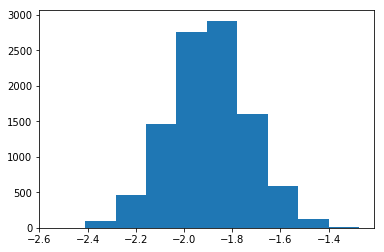

In [327]:
results = []
def X(x):
    a = (1/((x*.25)*math.sqrt(2*math.pi)))
    f = (x-3)
    e = (f/.25)**2
    d = math.log(e,10)
    c= -.5*(d)
    b = math.e**c
    return math.log(a*b,10)
    
#print(x)
results = x.apply(X)
plt.hist(results)


**Part B**: Now, read in the file [`lognorm.csv`](https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jja0n7bg98m66x), available linked here and on Piazza. These are 25 samples from a log-normal distribution with unknown parameters $\mu$ and $\sigma$. Use bootstrapping with at least 1,000 re-sampling iterations to obtain 95% confidence intervals for each of the median and the parameter $\mu$ of the unknown log-normal distribution from which these data originate. Note that the two are related by $\tilde{x} = e^{\mu}$, so the two confidence intervals are related.

In [164]:
dfLog = pd.read_csv("/home/elena/lognorm.csv")
dfLog.head()

,10.676828893379225
0,12.436454
1,13.765776
2,14.930567
3,9.339963
4,10.074658


In [166]:
def bootstrap_resample(X, n=None):
    if n == None:
        n = len(X)  
    resample_i = np.floor(np.random.rand(n)*len(X)).astype(int)
    X_resample = np.append(dfLog, resample_i)
    return X_resample
bootstrap_resample(dfLog, 1000)

array([ 12.43645368,  13.76577576,  14.93056694, ...,   6.        ,
        15.        ,  12.        ])

**Since we bootstrapped, we can take advantage of the CLT and use the classic confidence interval formula**

In [243]:
bootlog = bootstrap_resample(dfLog, 1000)
print("Mean: ", bootlog.mean())

Mean:  11.1535087304


In [245]:
print("Std: ", bootlog.std())

Std:  6.88820414463


In [246]:
print("n: ", len(bootlog))

n:  1024


In [244]:
stats.norm.ppf(.95)

1.6448536269514722

In [247]:
11.1535087304 + (1.6448536269514722 *(math.sqrt((6.88820414463*6.88820414463)/1024)))

11.5075739669774

In [248]:
11.1535087304 - (1.6448536269514722 *(math.sqrt((6.88820414463*6.88820414463)/1024)))

10.7994434938226

**The confidence interval is (11.508,  10.799)**

**Part C**: If $Y$ is normally distributed with mean $\mu$ and standard deviation $\sigma$, the Central Limit Theorem and what is commonly known as the ["68-95-99.7 Rule"](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule) suggest that:
* 68.3% of the data for $Y$ fall within the interval $[\mu - \sigma, \mu + \sigma]$
* 95.4% of the data fall within the interval $[\mu - 2\sigma, \mu + 2\sigma]$
* 99.7% of the data fall within the interval $[\mu - 3\sigma, \mu + 3\sigma]$

If we have $X \sim LogNorm(\mu, \sigma)$, then $Y = \log(X) \sim N(\mu, \sigma^2)$ follows this 68-95-99.7 Rule for normal distributions. Since $Y = \log(X)$ is a one-to-one function, we can develop a similar 68-95-99.7 Rule for the log-normal distribution. This is just one of many reasons why we love one-to-one functions! Take the 68% part of the rule, for example.

* 68.3% of the data for $Y$ are within $[\mu - \sigma, \mu + \sigma]$.
* This means that 68.3% of the data for $X = e^Y$ are within $\left[ e^{\mu - \sigma}, e^{\mu + \sigma}\right] = \left[ e^{\mu}/e^{\sigma}, ~~ e^{\mu} e^{\sigma}\right]$
* For brevity's sake, we often rewrite $m = e^{\mu}$ and $s = e^{\sigma}$, so that this interval becomes $[m/s, ms]$. Note that $m = \tilde{x}$ is the median.

Formulate a hypothesis regarding the form for the 95 and 99.7% parts of the Rule are for the log-normal distribution. Then, finish the code below to verify that your hypotheses are correct.

** If the data is distributed logrithmically then it will be skewed and one side will be contributing greater to the total percentage of the data that falls within a region, and the total area will change because it should be equal to the integral of the range. So if there is a range that is one standard deviation above and below, the area should equal the cdf of the function from one standard deviation below and above the mean as the bounds and since the distribution is some function that involves e to a power, the area should increase exponentially because the integral of e^x is e^x. **

In [328]:
sigma = 0.25
mu = 3
n = 10000
x = pd.Series(np.random.lognormal(mean=mu, sigma=sigma, size=n))

In [356]:
#one std from mean 
stats.lognorm.cdf(3.25,s = .25,scale = math.e**3)

1.6038242145315998e-13

In [357]:
#two std from mean 
stats.lognorm.cdf(3.5,s = .25,scale = math.e** 3)

1.3847739539286893e-12

In [358]:
#three std from mean 
stats.lognorm.cdf(3.75,s = .25,scale = math.e**3)

9.5346826099919074e-12